# Задача калибровки 
Кузьмин Иван 
20.06.2024

Исходный сигнал искажается стахостическим шумом с известным параметром дисперсии.
Цель востановить исходный сигнал с помощью ансамбля наблюдений. 

## Моделирование измерений


<Figure size 640x480 with 0 Axes>

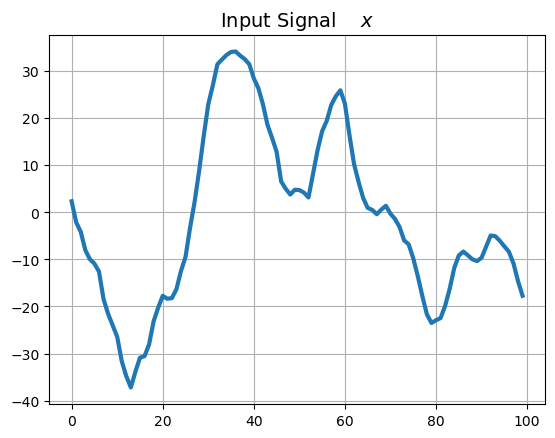

<Figure size 640x480 with 0 Axes>

In [29]:
#код из примера
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, inv
from math import exp

M = 100 # Dimension of Unknown Signal x
s = 1 # Standard deviation for random noise (Var = s^2)
b0 = np.arange(7, -1, -1)
b = np.append(b0, np.zeros(M-b0.shape[0]))
B = toeplitz(b)
F = np.matmul(B, np.transpose(B))
def get_x_random(M=M,B=B):
    g = np.random.normal(0, 1, size=M)
    x = np.matmul(B, g)
    return x
x = get_x_random(M)

plt.plot(x, linewidth=3)
plt.title(r'Input Signal    $x$', fontsize=14)
plt.grid()
plt.figure()

In [30]:
#априморный сигнал
x0 = x*0+1

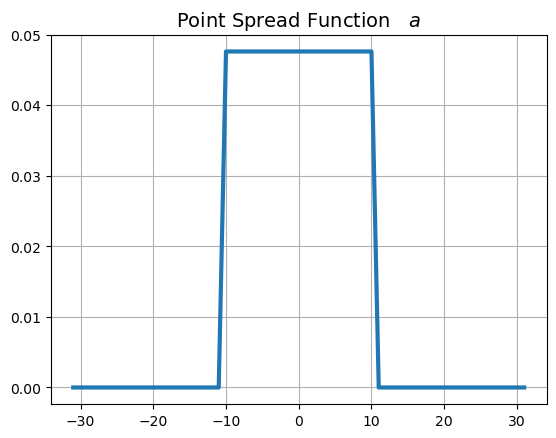

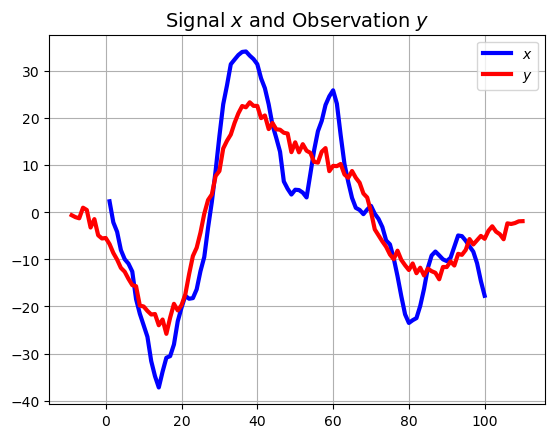

In [31]:
# Profile of the Point Spread Function a
d=10; al=-d; ar=d; a = np.ones(ar-al+1); # Rectangular Profile
a = a/sum(a) # 'Normalized' PSF: sum a_i = 1

plt.plot([i for i in range(al-(-al+ar+1), ar+1+(-al+ar+1))], np.insert(np.zeros(2*(-al+ar+1)), -al+ar+1, a), linewidth=3)
plt.title(r'Point Spread Function   $a$', fontsize=14)
plt.grid()
plt.figure()

N = M + ar-al # Dimension of observed signal y
A = np.zeros((N,M)) # Matrix A determined by PSF a
for j in range(M):
    A[[m+j for m in range(ar-al+1)],j] = a

def get_y(A,x,S):
    return np.matmul(A, x) + S @ np.random.normal(0, 1, size=S.shape[0]) # Measurement
    
S = np.eye(N) * s**2  
y = get_y(A,x,S)

plt.plot([i+1 for i in range(M)], x, label=r'$x$', linewidth=3, color='blue')
plt.plot([i for i in range(1+al, M+ar+1)], y, label=r'$y$', linewidth=3, color='red')
plt.title(r'Signal $x$ and Observation $y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

## Калибровка
Ksi=A*Phi+nu  
n *1 = n *m * m *1 n *1  
n=120  
m=100


In [8]:
#Каноническая информация
def get_G_i(ksi,phi):
    return np.matrix(ksi).T @ np.matrix(phi)
def get_H_i(ksi,phi):
    return np.matrix(phi).T @ np.matrix(phi)
def get_x_Q_est_from_GH(G,H,S,F,x0):
    A0 = G@inv(H)
    J = np.trace(inv(H)@(F+x0*x0.T)) * S
    alpha = np.trace(inv(H)@(F+x0*x0.T))
    Q = inv(1/(alpha+1) * A0.T@ inv(S) @ A0 + inv(F))
    R = 1/(alpha+1)* Q @ A0.T @ inv(S)
    r = Q @ inv(F) @ x0
    x_est = R@y+r
    return np.array(x_est)[0], Q
"""тут перешли к матрицам так как я не смог из двух векторов получить матрицу в np.array"""

'тут перешли к матрицам так как я не смог из двух векторов получить матрицу в np.array'

Text(0.5, 1.0, 'Калибровочные случанйные сигналы')

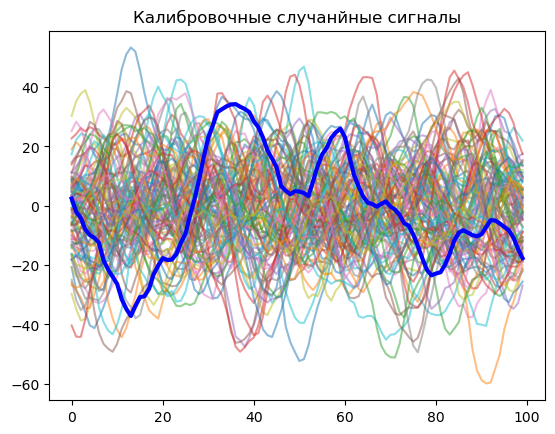

In [32]:
K = 100 #=M количество каллибровочных сигналов. По идеи должно быть больше чем размерность вектора X
#Сигналы и погрешность
Phi = np.zeros([K,M]) #K стобцев и М строк dimKalibr dimX
# Nu = np.zeros([K,M])
for k in range(K):
    Phi[k] = get_x_random(M)
    plt.plot(Phi[k],alpha=0.5)
#ищмерения
Ksi = np.zeros([K,N]) #N размер измерений, зависит от А
for k, phi in enumerate(Phi):
    Ksi[k] = get_y(A,phi,S)
plt.plot(x,linewidth=3,color='blue')
plt.title("Калибровочные случанйные сигналы")

In [10]:
A.shape, x.shape, Phi[0].T.shape, Ksi[0].shape

((120, 100), (100,), (100,), (120,))

In [33]:
#собираем каноническую информацию
# иницилищицрем нулем
G = get_G_i(Ksi[0]*0,Phi[0]*0)
H = get_H_i(Ksi[0]*0,Phi[0]*0) 
for ksi, phi in zip(Ksi, Phi): 
    G += get_G_i(ksi,phi)
    H += get_H_i(ksi,phi)
G.shape,H.shape

((120, 100), (100, 100))

In [12]:
#математика
A0 = G@inv(H)
J = np.trace(inv(H)@(F+x0*x0.T)) * S
alpha = np.trace(inv(H)@(F+x0*x0.T))
Q = inv(1/(alpha+1) * A0.T@ inv(S) @ A0 + inv(F))
R = 1/(alpha+1)* Q @ A0.T @ inv(S)
r = Q @ inv(F) @ x0
x_est = R@y+r
np.array(x_est)[0]

array([  4.49850921,   5.59873258,   6.54699748,   7.24533208,
         7.63532855,   7.68495002,   7.45489283,   6.89067999,
         5.89481929,   4.61715883,   3.06352298,   1.38832961,
        -0.35558063,  -2.18349353,  -4.22747904,  -6.1928799 ,
        -8.22638746, -10.06258902, -11.89221286, -13.75013635,
       -15.63752617, -17.32878688, -18.84921808, -20.17257462,
       -21.40596193, -22.33593004, -22.79859373, -22.90976541,
       -22.62684107, -22.05349023, -21.09311269, -19.77390514,
       -18.08329292, -16.32012561, -14.42299633, -12.6381179 ,
       -10.91661779,  -9.28741369,  -7.88103724,  -7.00199875,
        -6.49290753,  -6.28001395,  -6.23778739,  -6.42933351,
        -6.9444315 ,  -7.71551896,  -8.59041955,  -9.59647266,
       -10.80292884, -12.24074317, -13.96340853, -15.85793945,
       -17.88940953, -20.02672846, -21.93655416, -23.5918081 ,
       -25.00256225, -25.90558634, -26.29770076, -26.31890169,
       -25.82725932, -25.35506193, -24.66204035, -23.72

In [34]:
def plot_est(x,y,est,title,err_est=None):
    #для удобства построение резульататов
    style= {'linewidth':3}
    plt.plot(x, label='x',color='blue',**style)
    if y is not None:
        plt.plot(y,label='Measur',color='red',**style)
    plt.plot(x_est,label='x_est',color='green',linewidth=2)
    plt.title(title)
    if err_est is not None: 
        plt.plot(x_est-err_est, '--', color='green',label='err_est')
        plt.plot(x_est+err_est, '--', color='green')
    plt.legend()
    plt.figure()
    

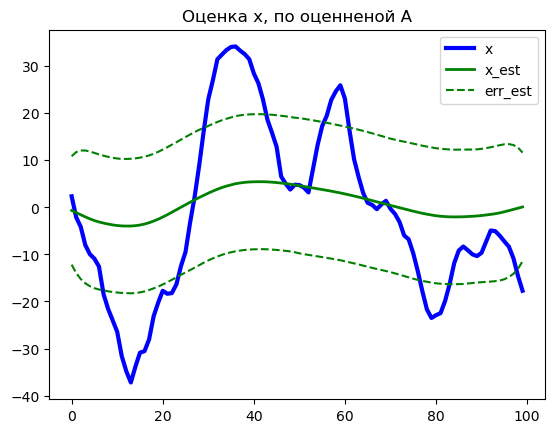

<Figure size 640x480 with 0 Axes>

In [35]:
x_est, Q = get_x_Q_est_from_GH(G,H,S,F,x0)
plot_est(x,None,x_est, 'Оценка x, по оценненой А', err_est=np.sqrt(Q.diagonal()))

## Проведем несколько измерений с один и тем же входным сигналом

C:\Users\ikuz2\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ikuz2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


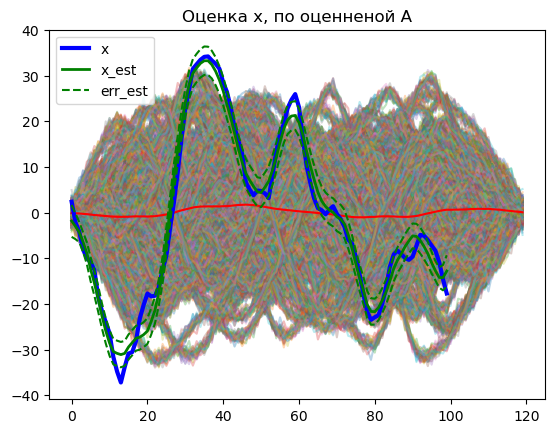

<Figure size 640x480 with 0 Axes>

In [44]:
def calc_estimate(N_kolib, N_repeat,M=M,S=S,F=F,x0=x0,plot=False):
    #Колисечтво колибровочных сигналов, и количество повторений каждого сигнала
    G = get_G_i(Ksi[0]*0,Phi[0]*0)
    H = get_H_i(Ksi[0]*0,Phi[0]*0) 
    means=y*0
    for k in range(N_kolib):
 
        phi = get_x_random(M)
        for i in range(N_repeat):
            ksi =  get_y(A,phi,S)
            if plot:
                means += ksi
                plt.plot(ksi,alpha=0.3)
            G += get_G_i(ksi,phi)
            H += get_H_i(ksi,phi)
    if plot:
        plt.plot(means/N_kolib/N_repeat,color='red')
    try:
        return get_x_Q_est_from_GH(G,H,S,F,x0)
    except: 
        return x*0,F*0
    return get_x_Q_est_from_GH(G,H,S,F,x0)

x_est, Q = calc_estimate(150,30,plot=True)
plot_est(x,None,x_est, 'Оценка x, по оценненой А', err_est=np.sqrt(Q.diagonal()))

Заметим что иногда везет, и даже с 100,1 дает хорошую оценку

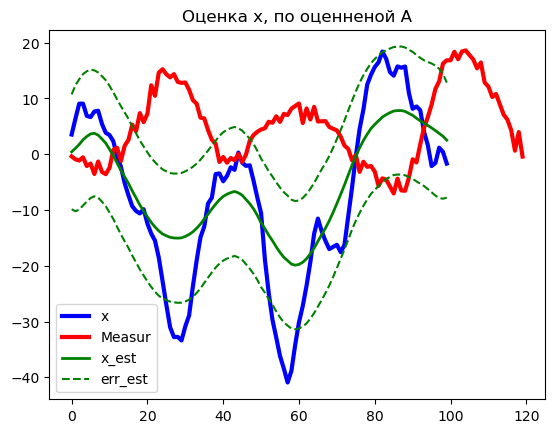

<Figure size 640x480 with 0 Axes>

In [16]:
#удачный график
plot_est(x,ksi,x_est, 'Оценка x, по оценненой А', err_est=np.sqrt(Q.diagonal()))

### посмтоим поверхность оценки

In [37]:
from itertools import product
N_kalib = np.arange(9, 150,10)
N_repeat = np.arange(1,20)
grid = product(N_kalib,N_repeat)
# data = map(calc_estimate, grid)
# X,Y = np.meshgrid(N_kalib, N_repeat)
# _,Z = calc_estimate(X,Y)


In [18]:
grid = np.array(list(product(N_kalib,N_repeat)))
total_error = np.zeros(grid.shape[0])
for i,nknr in enumerate(grid):
    _, Q =  calc_estimate(*nknr)
    total_error[i] =Q.trace()

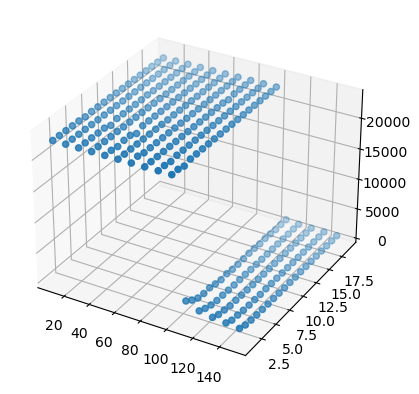

In [19]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(grid[:,0],grid[:,1],total_error,)

In [20]:
N_kalib = np.arange(99, 105)
N_repeat = np.arange(1,5)
grid = product(N_kalib,N_repeat)
grid = np.array(list(product(N_kalib,N_repeat)))
total_error = np.zeros(grid.shape[0])
Dtotal_error = np.zeros_like(total_error)

Drepeat = 10
for i,nknr in enumerate(grid):
    #Нотация Канонической ифнормации для среднего (S,T,n)
    SQtr = 0
    TQtr = 0
    for _ in range(Drepeat): 
        _, Q =  calc_estimate(*nknr)
        SQtr += Q.trace()
        TQtr += Q.trace()**2
    total_error[i] = SQtr/Drepeat
    Dtotal_error[i] = np.sqrt((TQtr-SQtr**2/Drepeat) / (Drepeat-1)/Drepeat)

Text(0.5, 0, '$E||x-\\hat x||^2$')

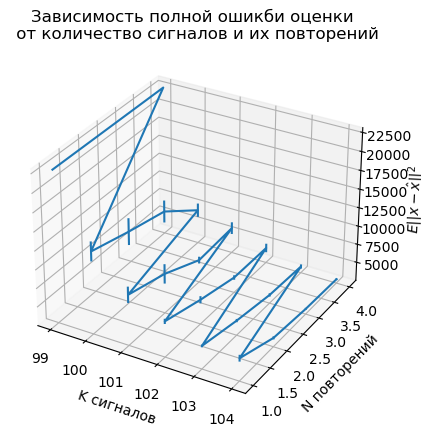

In [21]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.errorbar(grid[:,0],grid[:,1],total_error,Dtotal_error)
ax.set_title("Зависимость полной ошикби оценки \n от количество сигналов и их повторений")
ax.set_xlabel("K сигналов")
ax.set_ylabel("N повторений")
ax.set_zlabel(r"$E||x-\hat x||^2$")

In [45]:
X,Y = np.meshgrid(N_kalib,N_repeat,sparse=True)
X,Y
def f(x,y,S=S):
    # print("F")
    #Нотация Канонической ифнормации для среднего (S,T,n)
    SQtr = 0
    TQtr = 0
    Drepeat = 3
    for _ in range(Drepeat): 
        _, Q =  calc_estimate(x,y,S=S)
        SQtr += Q.trace()
        TQtr += Q.trace()**2
    # total_error[i] = SQtr/Drepeat
    # Dtotal_error[i] = np.sqrt((TQtr-SQtr**2/Drepeat) / (Drepeat-1)/Drepeat)
    return SQtr/Drepeat, np.sqrt((TQtr-SQtr**2/Drepeat) / (Drepeat-1)/Drepeat)

In [58]:
N_kalib = np.arange(99, 110)
X,Y = np.meshgrid(N_kalib,N_repeat,sparse=False)
N_repeat = np.arange(1,10)
Z,Zerr = np.vectorize(lambda X,Y: f(X,Y,S=S/3))(X,Y)

Убедимся что с ростом дискретизаци измеряемой величины (ось 100-108) и ростов количества наблюдений (ось 0-10) погрешность по вертикальной оси уменьшается. Значит мы успешно востанавливаем случайно зашумленный сигнал

На графике: \
зеленный точки - погрешность \
усы - оценка станадртного отклонения погрешности

([<mpl_toolkits.mplot3d.art3d.Line3DCollection at 0x2b1eea10d50>], [], [])

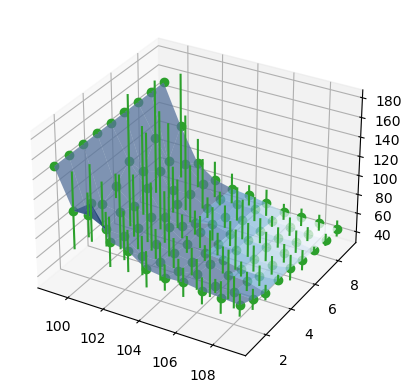

In [54]:

from matplotlib import cm
# X,Y = np.meshgrid(N_kalib,N_repeat,sparse=False)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, np.sqrt(Z), vmax=5000 ,cmap=cm.Blues,alpha=0.5)
ax.plot_surface(X, Y, np.sqrt(Z),vmax=60,cmap=cm.Blues,alpha=0.5)
ax.errorbar(X.flatten(),Y.flatten(),np.sqrt(Z).flatten(),np.sqrt(Zerr).flatten(),fmt='o')
